In [ ]:
import pandas as pd

df = pd.read_csv('/content/students_updated.csv')

subject_cols = ['Math', 'Science', 'English', 'History', 'Computer']

# 1. Average marks per subject
avg_per_subject = df[subject_cols].mean()
print("Average Marks Per Subject:\n", avg_per_subject)


Average Marks Per Subject:
 Math        73.68
Science     72.18
English     72.56
History     68.80
Computer    78.50
dtype: float64


In [ ]:
# 2. Top 5 students by average
df = pd.read_csv('/content/students_updated.csv')
top_students = df[['Name', 'Average Marks']].sort_values(by='Average Marks', ascending=False).head(5)
print("\nTop 5 Students by Average Marks:\n", top_students)


Top 5 Students by Average Marks:
        Name  Average Marks
13     Riya           88.2
0   Pallavi           86.2
35      Ira           83.8
47   Aadhya           82.4
29     Mira           80.8


In [ ]:
# 3. Number of students per grade
grade_counts = df['Grade'].value_counts().sort_index(ascending=False)
print("\nNumber of Students per Grade:\n", grade_counts)


Number of Students per Grade:
 Grade
F     3
D    15
C    24
B     8
Name: count, dtype: int64


In [ ]:
# 4. Correlation matrix
correlation = df[subject_cols + ['Attendance (%)']].corr()
print("\nCorrelation Matrix:\n", correlation)


Correlation Matrix:
                     Math   Science   English   History  Computer  \
Math            1.000000  0.209570  0.162445 -0.111603  0.330654   
Science         0.209570  1.000000 -0.029310  0.043524 -0.058633   
English         0.162445 -0.029310  1.000000 -0.034532 -0.182426   
History        -0.111603  0.043524 -0.034532  1.000000  0.089506   
Computer        0.330654 -0.058633 -0.182426  0.089506  1.000000   
Attendance (%)  0.018004  0.108921 -0.255332 -0.021544  0.124376   

                Attendance (%)  
Math                  0.018004  
Science               0.108921  
English              -0.255332  
History              -0.021544  
Computer              0.124376  
Attendance (%)        1.000000  


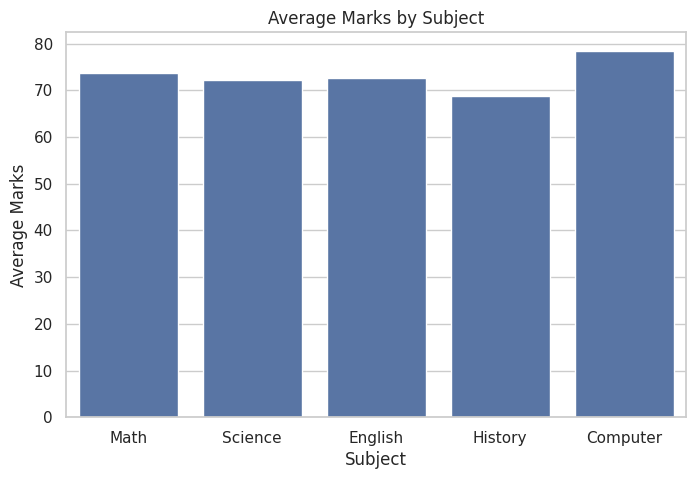

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

subject_cols = ['Math', 'Science', 'English', 'History', 'Computer']

# Bar chart: Average marks by subject
avg_per_subject = df[subject_cols].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_per_subject.index, y=avg_per_subject.values)
plt.title("Average Marks by Subject")
plt.ylabel("Average Marks")
plt.xlabel("Subject")
plt.show()



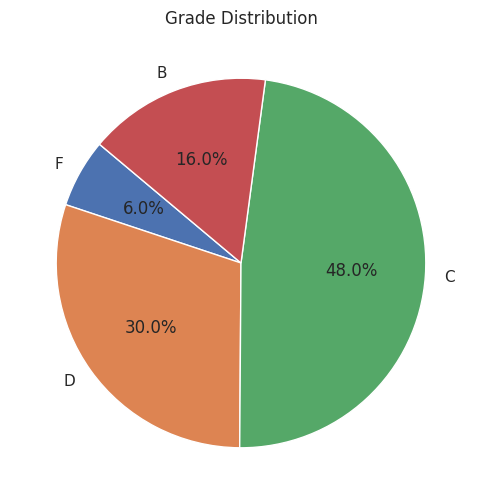

In [ ]:
grade_counts = df['Grade'].value_counts().sort_index(ascending=False)
plt.figure(figsize=(6, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Grade Distribution")
plt.show()

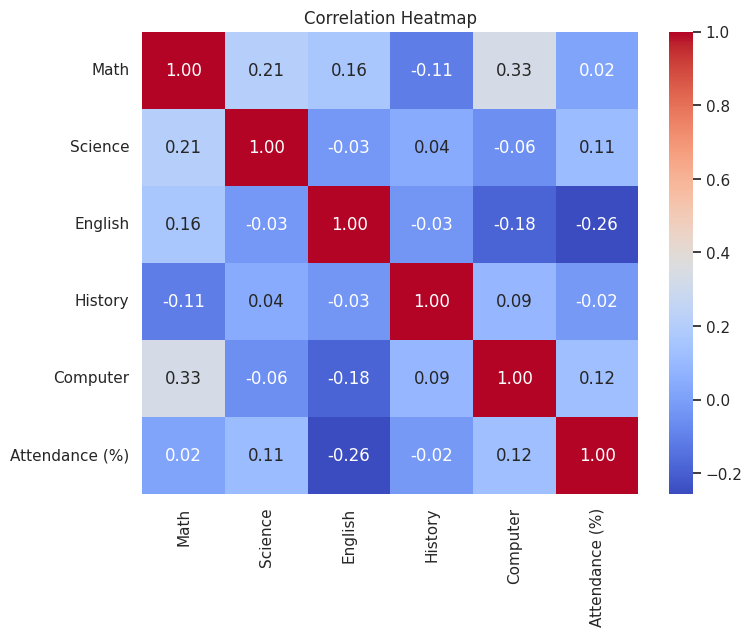

In [ ]:
corr = df[subject_cols + ['Attendance (%)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
plt.savefig('Grade Distribution.png')

<Figure size 640x480 with 0 Axes>

<ipython-input-57-2c76d5aaf276>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


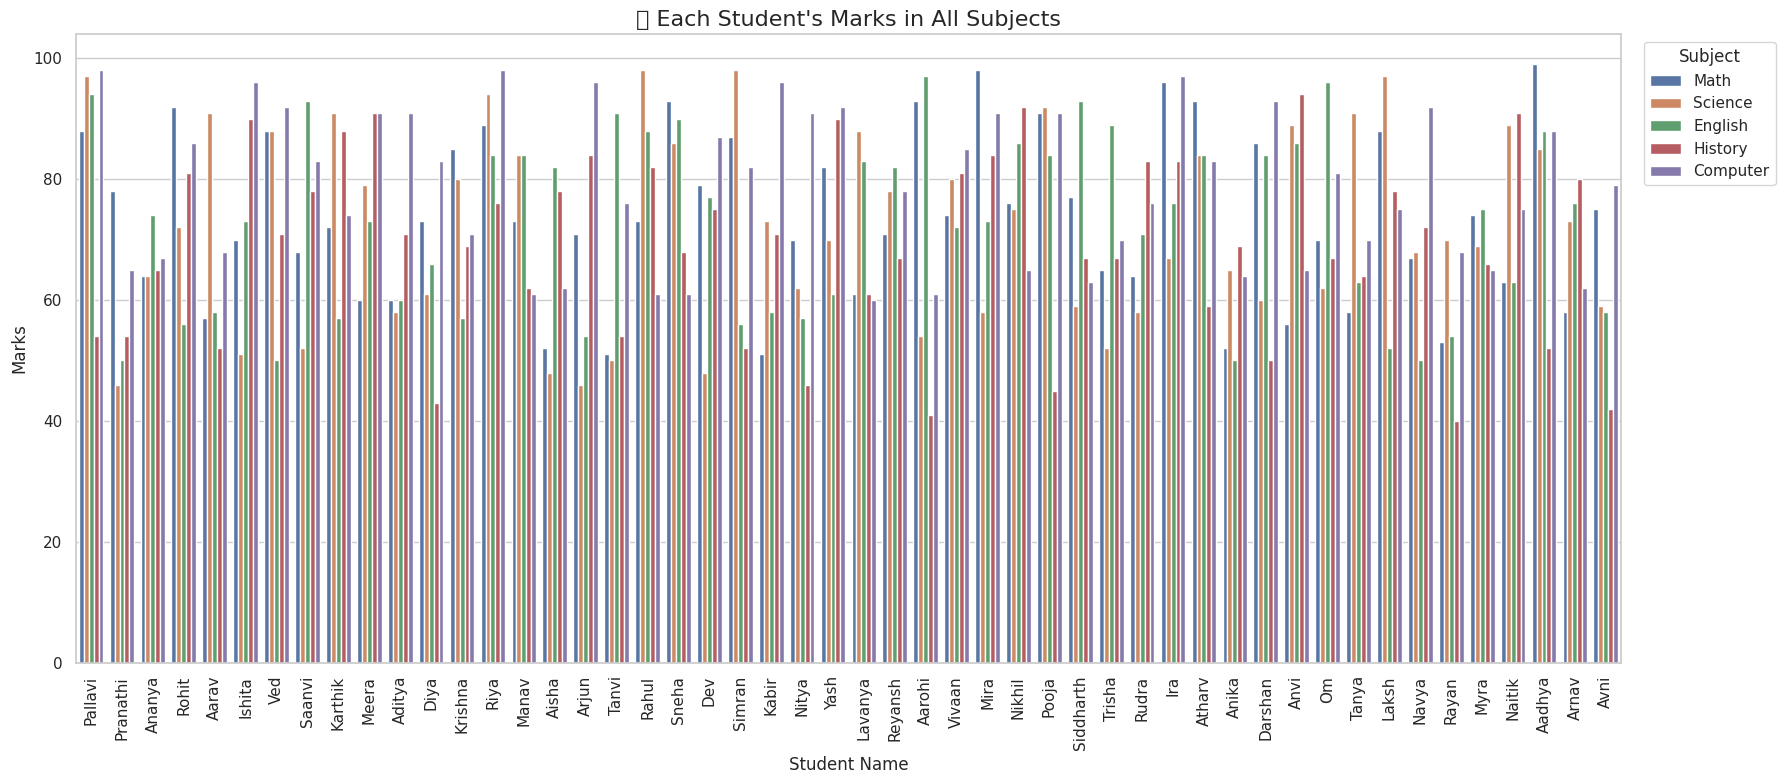

In [ ]:
# Melt the DataFrame to long format for seaborn plotting
df_melted = df.melt(id_vars='Name', value_vars=subject_cols,
                    var_name='Subject', value_name='Marks')

# Set the style
sns.set(style="whitegrid")

# Plot the grouped bar chart
plt.figure(figsize=(18, 8))
sns.barplot(x='Name', y='Marks', hue='Subject', data=df_melted)

# Customize the plot
plt.title("📊 Each Student's Marks in All Subjects", fontsize=16)
plt.xlabel("Student Name")
plt.ylabel("Marks")
plt.xticks(rotation=90)
plt.legend(title='Subject', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

Enter student name: Pallavi


<ipython-input-58-0a5bbe7e1d1a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=student_data.index, y=student_data.values, palette="viridis")
<ipython-input-58-0a5bbe7e1d1a>:14: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


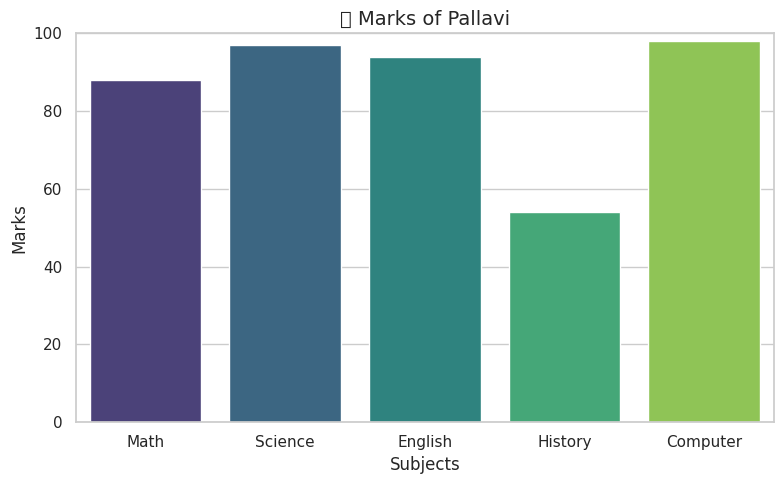

In [ ]:
student_name = input("Enter student name: ")

# Check if student exists
if student_name in df['Name'].values:
    student_data = df[df['Name'] == student_name][subject_cols].iloc[0]

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=student_data.index, y=student_data.values, palette="viridis")
    plt.title(f"📘 Marks of {student_name}", fontsize=14)
    plt.xlabel("Subjects")
    plt.ylabel("Marks")
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()
else:
    print(f" Student '{student_name}' not found in the dataset.")

In [ ]:
max_subj = student_data.idxmax()
min_subj = student_data.idxmin()
print(f"\n Best Subject: {max_subj} ({student_data[max_subj]})")
print(f" Lowest Subject: {min_subj} ({student_data[min_subj]})")



 Best Subject: Computer (98)
 Lowest Subject: History (54)


Enter student name: Pranathi


<ipython-input-60-6a6273953c0c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=student_data.index, y=student_data.values, palette="viridis")
<ipython-input-60-6a6273953c0c>:14: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


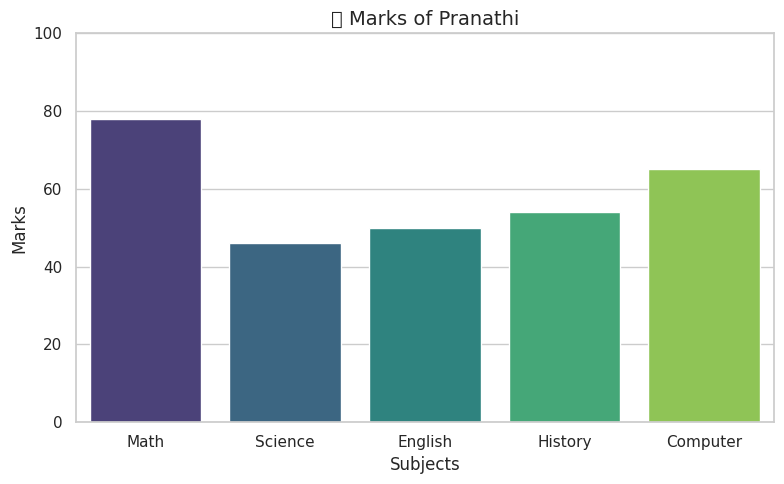

In [ ]:
student_name = input("Enter student name: ")

# Check if student exists
if student_name in df['Name'].values:
    student_data = df[df['Name'] == student_name][subject_cols].iloc[0]

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=student_data.index, y=student_data.values, palette="viridis")
    plt.title(f"📘 Marks of {student_name}", fontsize=14)
    plt.xlabel("Subjects")
    plt.ylabel("Marks")
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()
else:
    print(f" Student '{student_name}' not found in the dataset.")


Enter student name: Mira


<ipython-input-61-78bed1069ee9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=student_data.index, y=student_data.values, palette="viridis")
<ipython-input-61-78bed1069ee9>:14: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


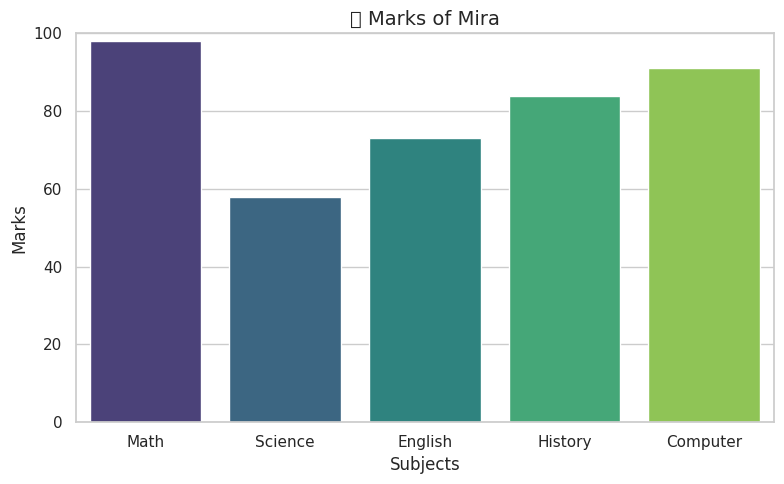

In [ ]:
student_name = input("Enter student name: ")

# Check if student exists
if student_name in df['Name'].values:
    student_data = df[df['Name'] == student_name][subject_cols].iloc[0]

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=student_data.index, y=student_data.values, palette="viridis")
    plt.title(f"📘 Marks of {student_name}", fontsize=14)
    plt.xlabel("Subjects")
    plt.ylabel("Marks")
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()
else:
    print(f"❌ Student '{student_name}' not found in the dataset.")

In [ ]:
print(f"\n {student_name}'s Marks:")
print(student_data.to_frame(name='Marks'))



 Mira's Marks:
          Marks
Math         98
Science      58
English      73
History      84
Computer     91


In [ ]:
max_subj = student_data.idxmax()
min_subj = student_data.idxmin()
print(f"\n Best Subject: {max_subj} ({student_data[max_subj]})")
print(f"Lowest Subject: {min_subj} ({student_data[min_subj]})")



 Best Subject: Math (98)
Lowest Subject: Science (58)


Enter student name: Pallavi


<ipython-input-64-1dcc731352b2>:35: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


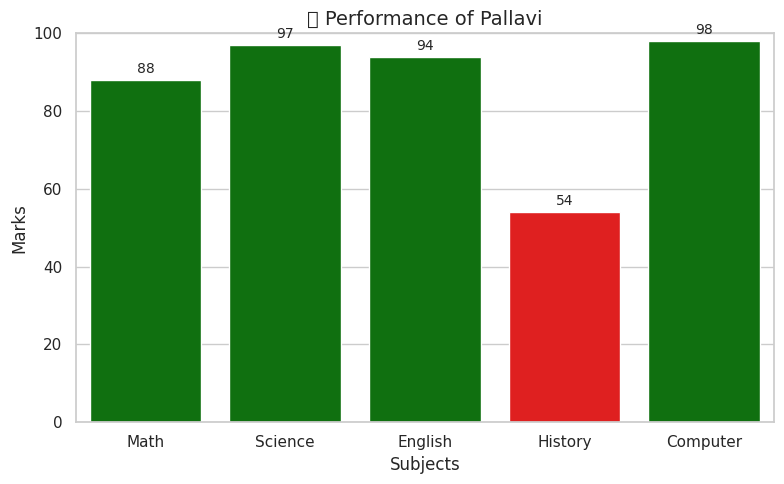

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/students_updated.csv")

# Define subject columns
subject_cols = ['Math', 'Science', 'English', 'History', 'Computer']

# Ask for student name
student_name = input("Enter student name: ")

# Check if student exists
if student_name in df['Name'].values:
    # Extract subject marks
    student_data = df[df['Name'] == student_name][subject_cols].iloc[0]

    # Generate color list based on marks
    colors = ['green' if mark >= 80 else 'orange' if mark >= 60 else 'red' for mark in student_data.values]

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=student_data.index, y=student_data.values, palette=colors)

    # Add value labels on bars
    for i, v in enumerate(student_data.values):
        plt.text(i, v + 1, f"{v}", ha='center', va='bottom', fontsize=10)

    # Customize plot
    plt.title(f"📘 Performance of {student_name}", fontsize=14)
    plt.xlabel("Subjects")
    plt.ylabel("Marks")
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

else:
    print(f" Student '{student_name}' not found in the dataset.")


In [ ]:
low_attendance_students = df[df["Attendance (%)"] < 75]
print("Students with Attendance Less Than 75%:")
print(low_attendance_students[['Name', 'Attendance (%)']])

Students with Attendance Less Than 75%:
       Name  Attendance (%)
3     Rohit              62
7    Saanvi              66
13     Riya              60
14    Manav              70
21   Simran              66
24     Yash              61
25  Lavanya              60
26  Reyansh              71
27   Aarohi              64
30   Nikhil              68
34    Rudra              62
39     Anvi              70
40       Om              67
